In [2]:
import pandas as pd

In [ ]:
train57 = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260115-222907_reopt2_train_567_test8_vstep1/merged_looporder_20260115-222908/shap_sample.csv")
train57_full = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260115-222907_reopt2_train_567_test8_vstep1/merged_looporder_20260115-222908/shap_full.csv")

train58 = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260115-223005_reopt2_train_5678_test9_vstep1/merged_looporder_20260115-223005/shap_sample.csv")
train58_full = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260115-223005_reopt2_train_5678_test9_vstep1/merged_looporder_20260115-223005/shap_full.csv")

train59 = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260115-223440_reopt2_train_56789_test10_vstep1/merged_looporder_20260115-223441/shap_sample.csv")
train59_full = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260115-223440_reopt2_train_56789_test10_vstep1/merged_looporder_20260115-223441/shap_full.csv")

train510 = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260116-032047_reopt2_train_5678910_test11_vstep1/merged_looporder_20260116-032055/shap_sample.csv")
train510_full = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260116-032047_reopt2_train_5678910_test11_vstep1/merged_looporder_20260116-032055/shap_full.csv")

train511 = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260116-061651_reopt2_train_567891011_notest_vstep1/merged_looporder_20260116-061656/shap_sample.csv")
train511_full = pd.read_csv("/home/ec2-user/ML-correlator/Tree_classifier_for_graphs/new_stuff/bayes_results/bayes_results_merged/20260116-061651_reopt2_train_567891011_notest_vstep1/merged_looporder_20260116-061656/shap_full.csv")

In [15]:
train511_full

,feature,importance,mean_signed_shap
0,Spectral_lap_eig_1,1.404513,-0.630256
1,Centrality_betweenness_std,0.364545,-0.123848
2,Motif_triangle_edge_frac_ge2,0.270946,-0.068288
3,Motif_triangle_edge_frac_zero,0.267847,0.000332
4,Centrality_closeness_std,0.180848,-0.049377
...,...,...,...
93,Motif_induced_g_4_4,0.000000,0.000000
94,Motif_induced_g_3_4,0.000000,0.000000
95,Motif_induced_g_2_4_per_Cn4,0.000000,0.000000
96,Spectral_lap_eig_0,0.000000,0.000000


In [13]:
columns = train511.columns

In [14]:
lap_features = [x for x in columns if 'lap' in x.lower()]
centrality_features = [x for x in columns if 'centrality' in x.lower()]
motifs5 = [x for x in columns if 'motif_5' in x.lower() or 'motif_induced5' in x.lower() or '5set' in x.lower()]
motifs4 = [x for x in columns if 'motif_4' in x.lower() or 'motif_induced4' in x.lower() or '4set' in x.lower() or 'square' in x.lower()\
           or ('_4' in x.lower() and 'lap' not in x.lower() and 'induced5' not in x.lower())]

motifs3 = [x for x in columns if 'triangle' in x.lower() or 'wedge' in x.lower()]

len(lap_features) + len(centrality_features) + len(motifs5) + len(motifs4) + len(motifs3)

98

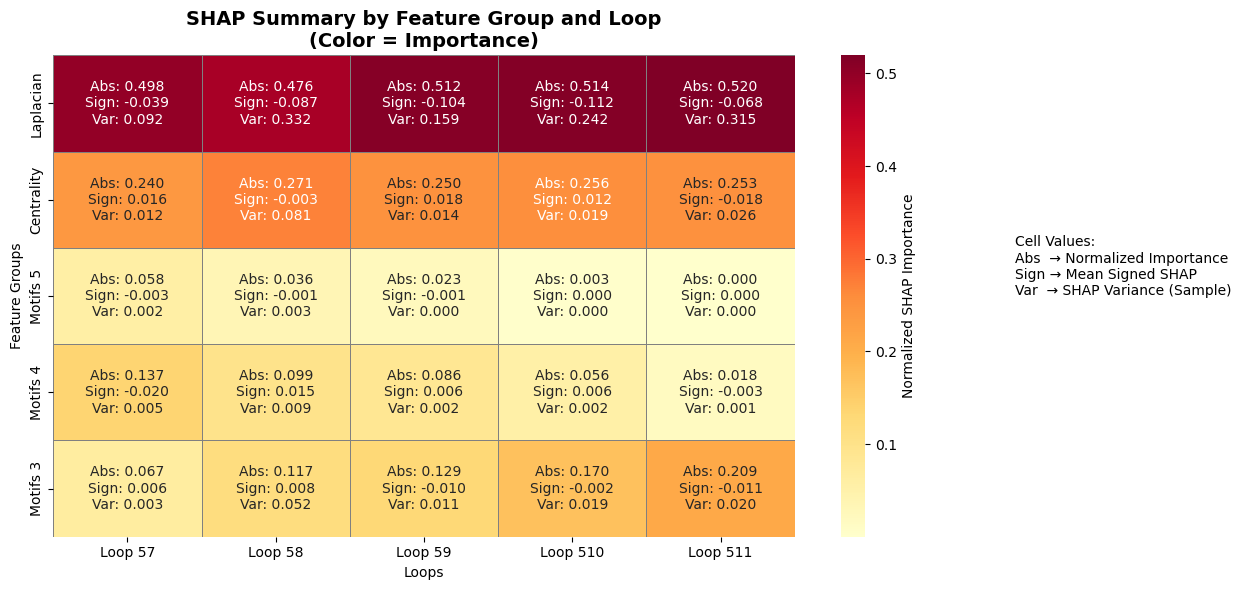

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Load Data (Ordered Loops)
# =====================================================
loop_data = {
    57: (train57, train57_full),
    58: (train58, train58_full),
    59: (train59, train59_full),
    510: (train510, train510_full),
    511: (train511, train511_full)
}

loops = sorted(loop_data.keys())

# =====================================================
# Feature Groups (unchanged)
# =====================================================
feature_groups = {
    'Laplacian': lap_features,
    'Centrality': centrality_features,
    'Motifs 5': motifs5,
    'Motifs 4': motifs4,
    'Motifs 3': motifs3
}

# =====================================================
# 1️⃣ IMPORTANCE (From FULL)
# =====================================================
importance_matrix = []

for group_name, group_features in feature_groups.items():
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        available = full_df[full_df['feature'].isin(group_features)]

        if len(available):
            value = available['importance'].mean()
        else:
            value = 0.0

        row.append(value)

    importance_matrix.append(row)

heatmap_abs = pd.DataFrame(
    importance_matrix,
    index=feature_groups.keys(),
    columns=[f'Loop {loop}' for loop in loops]
)

# Normalize → proportion per loop
heatmap_abs_norm = heatmap_abs.div(heatmap_abs.sum(axis=0), axis=1)

# =====================================================
# 2️⃣ SIGNED SHAP (From FULL)
# =====================================================
signed_matrix = []

for group_name, group_features in feature_groups.items():
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        available = full_df[full_df['feature'].isin(group_features)]

        if len(available):
            value = available['mean_signed_shap'].mean()
        else:
            value = 0.0

        row.append(value)

    signed_matrix.append(row)

heatmap_signed = pd.DataFrame(
    signed_matrix,
    index=feature_groups.keys(),
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 3️⃣ VARIANCE (From SAMPLE)
# =====================================================
var_matrix = []

for group_name, group_features in feature_groups.items():
    row = []

    for loop in loops:

        sample_df, _ = loop_data[loop]

        available_cols = [f for f in group_features if f in sample_df.columns]

        if available_cols:
            value = sample_df[available_cols].var().mean()
        else:
            value = 0.0

        row.append(value)

    var_matrix.append(row)

heatmap_var = pd.DataFrame(
    var_matrix,
    index=feature_groups.keys(),
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 4️⃣ BUILD MULTI-LINE ANNOTATIONS
# =====================================================
annot = heatmap_abs_norm.copy().astype(str)

for row in heatmap_abs_norm.index:
    for col in heatmap_abs_norm.columns:

        abs_val = heatmap_abs_norm.loc[row, col]
        signed_val = heatmap_signed.loc[row, col]
        var_val = heatmap_var.loc[row, col]

        annot.loc[row, col] = (
            f"Abs: {abs_val:.3f}\n"
            f"Sign: {signed_val:.3f}\n"
            f"Var: {var_val:.3f}"
        )

# =====================================================
# 5️⃣ FINAL PUBLICATION HEATMAP
# =====================================================
plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_abs_norm,
    annot=annot,
    fmt="",
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Normalized SHAP Importance'}
)

plt.title(
    'SHAP Summary by Feature Group and Loop\n'
    '(Color = Importance)',
    fontsize=14,
    fontweight='bold'
)

plt.ylabel('Feature Groups')
plt.xlabel('Loops')

plt.figtext(
    1.02, 0.5,
    "Cell Values:\n"
    "Abs  → Normalized Importance\n"
    "Sign → Mean Signed SHAP\n"
    "Var  → SHAP Variance (Sample)",
    fontsize=10
)

plt.tight_layout()
plt.show()

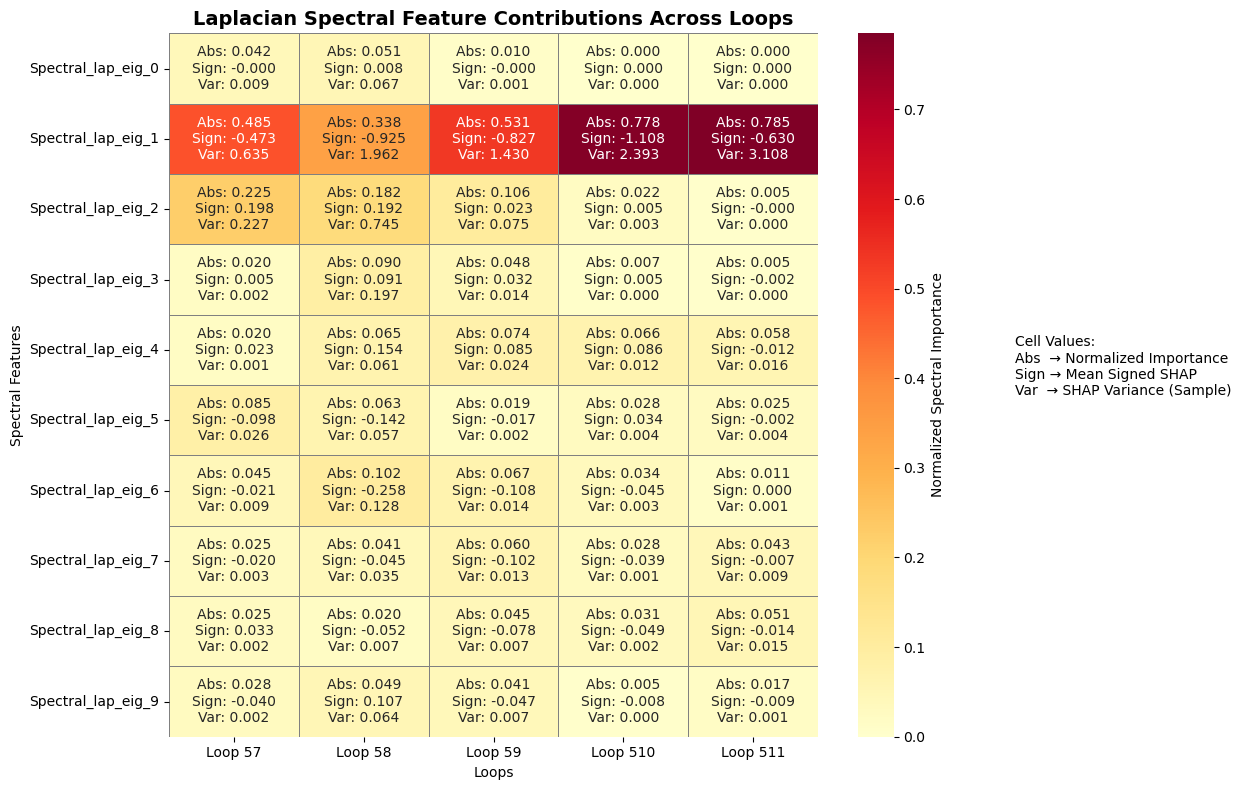

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Loop Data (Ordered)
# =====================================================
loop_data = {
    57: (train57, train57_full),
    58: (train58, train58_full),
    59: (train59, train59_full),
    510: (train510, train510_full),
    511: (train511, train511_full)
}

loops = sorted(loop_data.keys())

# =====================================================
# Laplacian Spectral Features
# =====================================================
# lap_features = your 10 spectral features

# =====================================================
# 1️⃣ IMPORTANCE (From FULL)
# =====================================================
laplacian_abs = []

for feature in lap_features:
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        match = full_df[full_df['feature'] == feature]

        if len(match):
            value = match['importance'].values[0]
        else:
            value = 0.0

        row.append(value)

    laplacian_abs.append(row)

laplacian_abs_df = pd.DataFrame(
    laplacian_abs,
    index=lap_features,
    columns=[f'Loop {loop}' for loop in loops]
)

# Normalize → proportion per loop
laplacian_abs_norm = laplacian_abs_df.div(
    laplacian_abs_df.sum(axis=0),
    axis=1
)

# =====================================================
# 2️⃣ SIGNED SHAP (From FULL)
# =====================================================
laplacian_signed = []

for feature in lap_features:
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        match = full_df[full_df['feature'] == feature]

        if len(match):
            value = match['mean_signed_shap'].values[0]
        else:
            value = 0.0

        row.append(value)

    laplacian_signed.append(row)

laplacian_signed_df = pd.DataFrame(
    laplacian_signed,
    index=lap_features,
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 3️⃣ VARIANCE (From SAMPLE)
# =====================================================
laplacian_var = []

for feature in lap_features:
    row = []

    for loop in loops:

        sample_df, _ = loop_data[loop]

        if feature in sample_df.columns:
            value = sample_df[feature].var()
        else:
            value = 0.0

        row.append(value)

    laplacian_var.append(row)

laplacian_var_df = pd.DataFrame(
    laplacian_var,
    index=lap_features,
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 4️⃣ BUILD MULTI-LINE ANNOTATIONS
# =====================================================
annot_lap = laplacian_abs_norm.copy().astype(str)

for row in laplacian_abs_norm.index:
    for col in laplacian_abs_norm.columns:

        abs_val = laplacian_abs_norm.loc[row, col]
        signed_val = laplacian_signed_df.loc[row, col]
        var_val = laplacian_var_df.loc[row, col]

        annot_lap.loc[row, col] = (
            f"Abs: {abs_val:.3f}\n"
            f"Sign: {signed_val:.3f}\n"
            f"Var: {var_val:.3f}"
        )

# =====================================================
# 5️⃣ FINAL HEATMAP (PUBLICATION STYLE)
# =====================================================
plt.figure(figsize=(10, 8))

sns.heatmap(
    laplacian_abs_norm,
    annot=annot_lap,
    fmt="",
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Normalized Spectral Importance'}
)

plt.title(
    'Laplacian Spectral Feature Contributions Across Loops',
    fontsize=14,
    fontweight='bold'
)

plt.ylabel('Spectral Features')
plt.xlabel('Loops')

plt.figtext(
    1.02, 0.5,
    "Cell Values:\n"
    "Abs  → Normalized Importance\n"
    "Sign → Mean Signed SHAP\n"
    "Var  → SHAP Variance (Sample)",
    fontsize=10
)

plt.tight_layout()
plt.show()

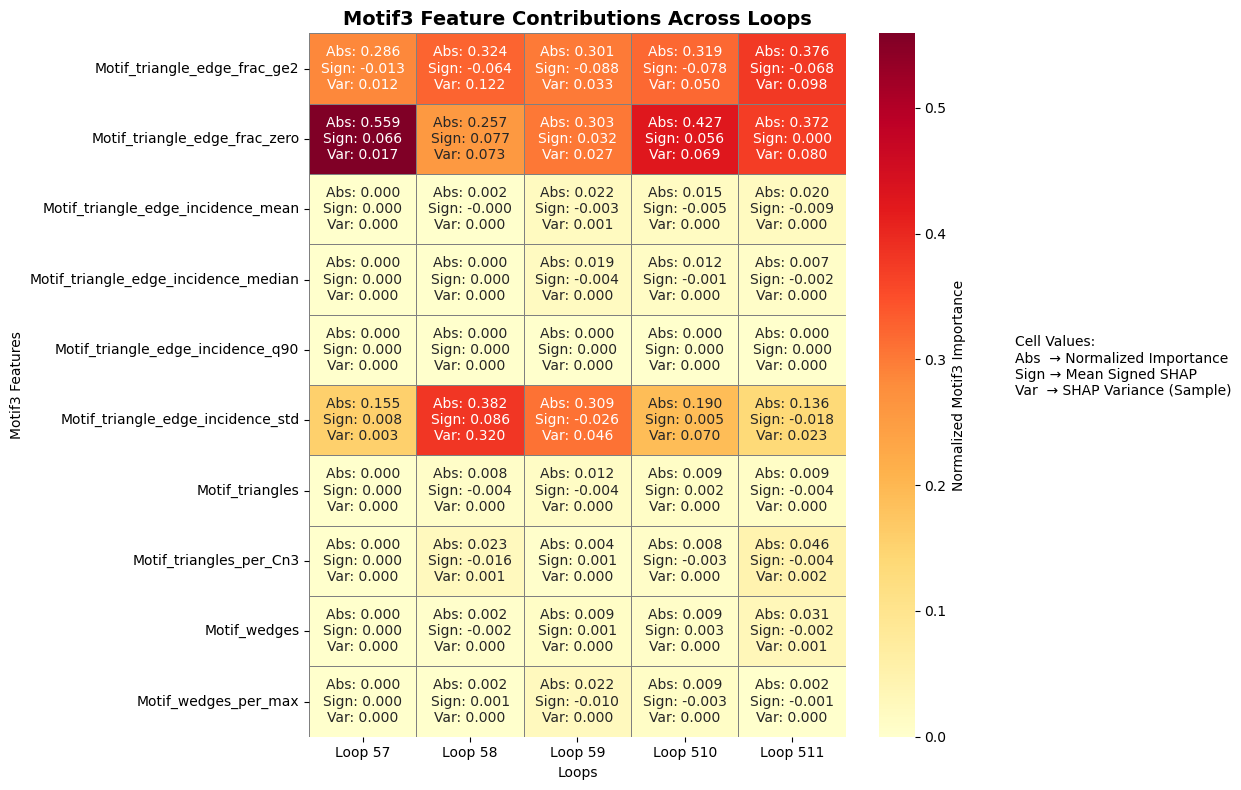

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Loop Data (Ordered)
# =====================================================
loop_data = {
    57: (train57, train57_full),
    58: (train58, train58_full),
    59: (train59, train59_full),
    510: (train510, train510_full),
    511: (train511, train511_full)
}

loops = sorted(loop_data.keys())

# =====================================================
# Motif3 Features
# =====================================================
# motifs3 = your triangle / wedge features

# =====================================================
# 1️⃣ IMPORTANCE (From FULL)
# =====================================================
motif3_abs = []

for feature in motifs3:
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        match = full_df[full_df['feature'] == feature]

        if len(match):
            value = match['importance'].values[0]
        else:
            value = 0.0

        row.append(value)

    motif3_abs.append(row)

motif3_abs_df = pd.DataFrame(
    motif3_abs,
    index=motifs3,
    columns=[f'Loop {loop}' for loop in loops]
)

# Normalize → proportion per loop
motif3_abs_norm = motif3_abs_df.div(
    motif3_abs_df.sum(axis=0),
    axis=1
)

# =====================================================
# 2️⃣ SIGNED SHAP (From FULL)
# =====================================================
motif3_signed = []

for feature in motifs3:
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        match = full_df[full_df['feature'] == feature]

        if len(match):
            value = match['mean_signed_shap'].values[0]
        else:
            value = 0.0

        row.append(value)

    motif3_signed.append(row)

motif3_signed_df = pd.DataFrame(
    motif3_signed,
    index=motifs3,
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 3️⃣ VARIANCE (From SAMPLE)
# =====================================================
motif3_var = []

for feature in motifs3:
    row = []

    for loop in loops:

        sample_df, _ = loop_data[loop]

        if feature in sample_df.columns:
            value = sample_df[feature].var()
        else:
            value = 0.0

        row.append(value)

    motif3_var.append(row)

motif3_var_df = pd.DataFrame(
    motif3_var,
    index=motifs3,
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 4️⃣ BUILD MULTI-LINE ANNOTATIONS
# =====================================================
annot_motif3 = motif3_abs_norm.copy().astype(str)

for row in motif3_abs_norm.index:
    for col in motif3_abs_norm.columns:

        abs_val = motif3_abs_norm.loc[row, col]
        signed_val = motif3_signed_df.loc[row, col]
        var_val = motif3_var_df.loc[row, col]

        annot_motif3.loc[row, col] = (
            f"Abs: {abs_val:.3f}\n"
            f"Sign: {signed_val:.3f}\n"
            f"Var: {var_val:.3f}"
        )

# =====================================================
# 5️⃣ FINAL HEATMAP (PUBLICATION STYLE)
# =====================================================
plt.figure(figsize=(10, 8))

sns.heatmap(
    motif3_abs_norm,
    annot=annot_motif3,
    fmt="",
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Normalized Motif3 Importance'}
)

plt.title(
    'Motif3 Feature Contributions Across Loops',
    fontsize=14,
    fontweight='bold'
)

plt.ylabel('Motif3 Features')
plt.xlabel('Loops')

plt.figtext(
    1.02, 0.5,
    "Cell Values:\n"
    "Abs  → Normalized Importance\n"
    "Sign → Mean Signed SHAP\n"
    "Var  → SHAP Variance (Sample)",
    fontsize=10
)

plt.tight_layout()
plt.show()

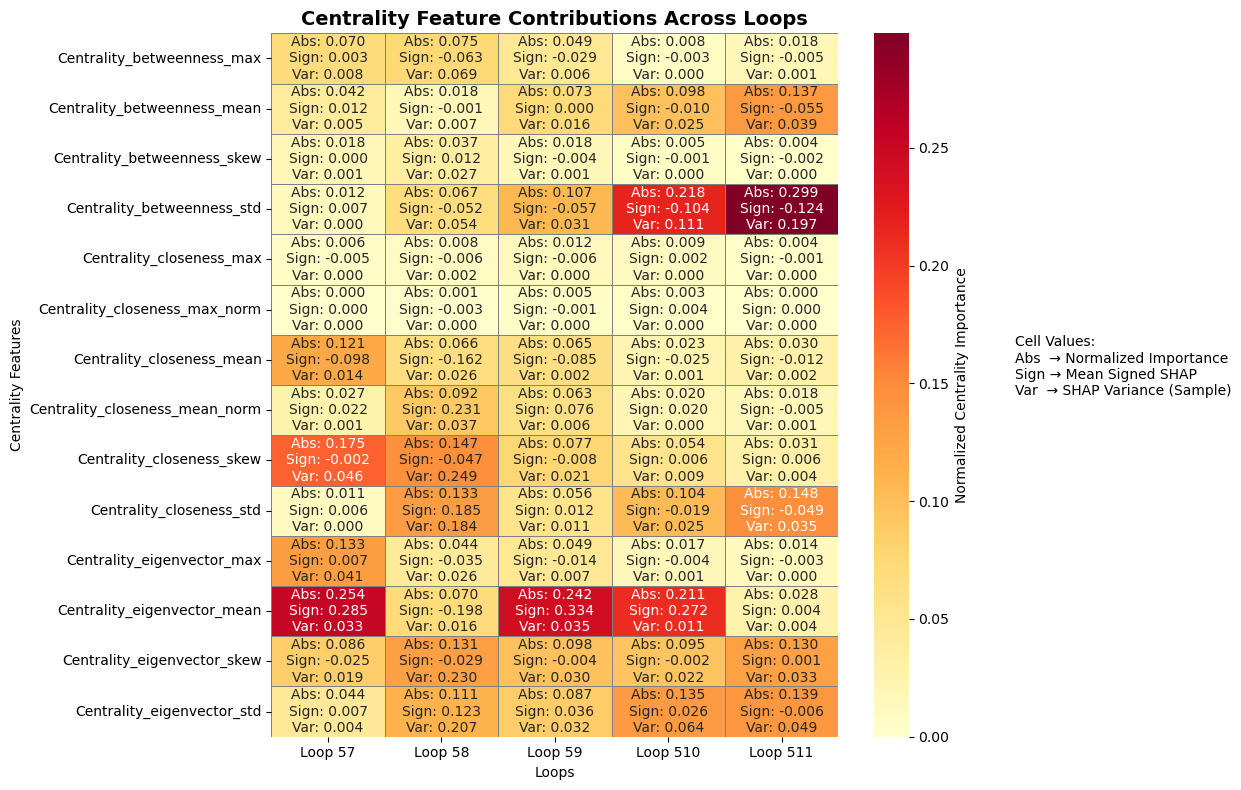

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================================
# Loop Data (Ordered)
# =====================================================
loop_data = {
    57: (train57, train57_full),
    58: (train58, train58_full),
    59: (train59, train59_full),
    510: (train510, train510_full),
    511: (train511, train511_full)
}

loops = sorted(loop_data.keys())

# =====================================================
# Centrality Features
# =====================================================
# centrality_features = your centrality variables

# =====================================================
# 1️⃣ IMPORTANCE (From FULL)
# =====================================================
centrality_abs = []

for feature in centrality_features:
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        match = full_df[full_df['feature'] == feature]

        if len(match):
            value = match['importance'].values[0]
        else:
            value = 0.0

        row.append(value)

    centrality_abs.append(row)

centrality_abs_df = pd.DataFrame(
    centrality_abs,
    index=centrality_features,
    columns=[f'Loop {loop}' for loop in loops]
)

# Normalize → proportion per loop
centrality_abs_norm = centrality_abs_df.div(
    centrality_abs_df.sum(axis=0),
    axis=1
)

# =====================================================
# 2️⃣ SIGNED SHAP (From FULL)
# =====================================================
centrality_signed = []

for feature in centrality_features:
    row = []

    for loop in loops:

        _, full_df = loop_data[loop]

        match = full_df[full_df['feature'] == feature]

        if len(match):
            value = match['mean_signed_shap'].values[0]
        else:
            value = 0.0

        row.append(value)

    centrality_signed.append(row)

centrality_signed_df = pd.DataFrame(
    centrality_signed,
    index=centrality_features,
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 3️⃣ VARIANCE (From SAMPLE)
# =====================================================
centrality_var = []

for feature in centrality_features:
    row = []

    for loop in loops:

        sample_df, _ = loop_data[loop]

        if feature in sample_df.columns:
            value = sample_df[feature].var()
        else:
            value = 0.0

        row.append(value)

    centrality_var.append(row)

centrality_var_df = pd.DataFrame(
    centrality_var,
    index=centrality_features,
    columns=[f'Loop {loop}' for loop in loops]
)

# =====================================================
# 4️⃣ BUILD MULTI-LINE ANNOTATIONS
# =====================================================
annot_centrality = centrality_abs_norm.copy().astype(str)

for row in centrality_abs_norm.index:
    for col in centrality_abs_norm.columns:

        abs_val = centrality_abs_norm.loc[row, col]
        signed_val = centrality_signed_df.loc[row, col]
        var_val = centrality_var_df.loc[row, col]

        annot_centrality.loc[row, col] = (
            f"Abs: {abs_val:.3f}\n"
            f"Sign: {signed_val:.3f}\n"
            f"Var: {var_val:.3f}"
        )

# =====================================================
# 5️⃣ FINAL HEATMAP (PUBLICATION STYLE)
# =====================================================
plt.figure(figsize=(10, 8))

sns.heatmap(
    centrality_abs_norm,
    annot=annot_centrality,
    fmt="",
    cmap='YlOrRd',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Normalized Centrality Importance'}
)

plt.title(
    'Centrality Feature Contributions Across Loops',
    fontsize=14,
    fontweight='bold'
)

plt.ylabel('Centrality Features')
plt.xlabel('Loops')

plt.figtext(
    1.02, 0.5,
    "Cell Values:\n"
    "Abs  → Normalized Importance\n"
    "Sign → Mean Signed SHAP\n"
    "Var  → SHAP Variance (Sample)",
    fontsize=10
)

plt.tight_layout()
plt.show()

In [20]:
centrality_features

['Centrality_betweenness_max',
 'Centrality_betweenness_mean',
 'Centrality_betweenness_skew',
 'Centrality_betweenness_std',
 'Centrality_closeness_max',
 'Centrality_closeness_max_norm',
 'Centrality_closeness_mean',
 'Centrality_closeness_mean_norm',
 'Centrality_closeness_skew',
 'Centrality_closeness_std',
 'Centrality_eigenvector_max',
 'Centrality_eigenvector_mean',
 'Centrality_eigenvector_skew',
 'Centrality_eigenvector_std']